# Giving a live example of lightkurve.periodogram()

In [4]:
import lightkurve
from lightkurve import KeplerLightCurveFile
from tqdm import tqdm

target = "KIC11615890"
# target = "KIC12069424"
lc = lightkurve.search_lightcurvefile(target, quarter=0).download().PDCSAP_FLUX.normalize()
for q in tqdm(range(1, 17)):
    try:
        lc = lc.append(lightkurve.search_lightcurvefile(target, quarter=q).download().PDCSAP_FLUX.normalize())
    except:
        pass
lc = lc.remove_nans()

100%|██████████| 16/16 [00:24<00:00,  1.53s/it]


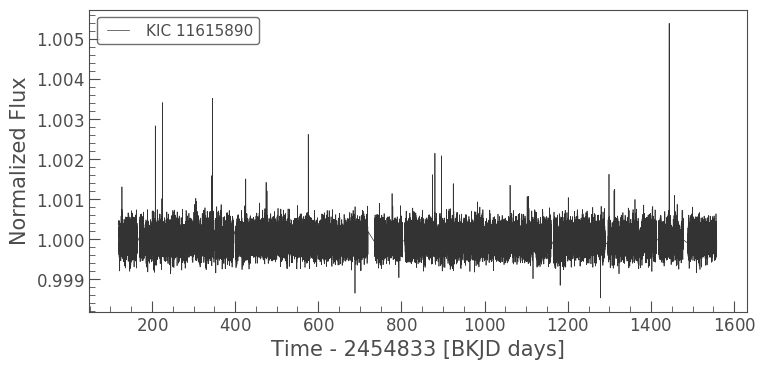

In [7]:
lc.plot()

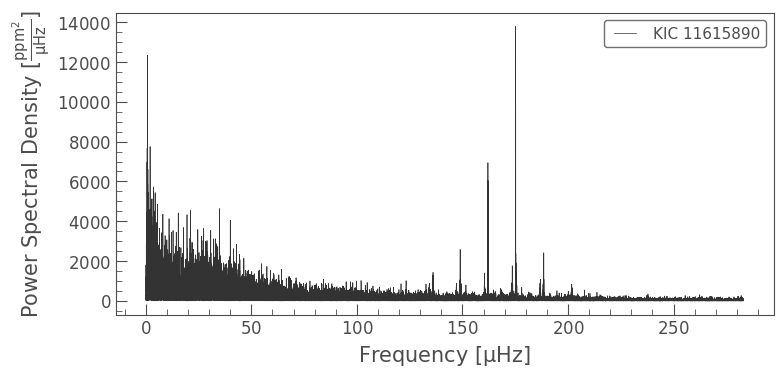

In [11]:
from astropy import units as u
pg = lc.to_periodogram(freq_unit=u.microhertz)
pg.plot()

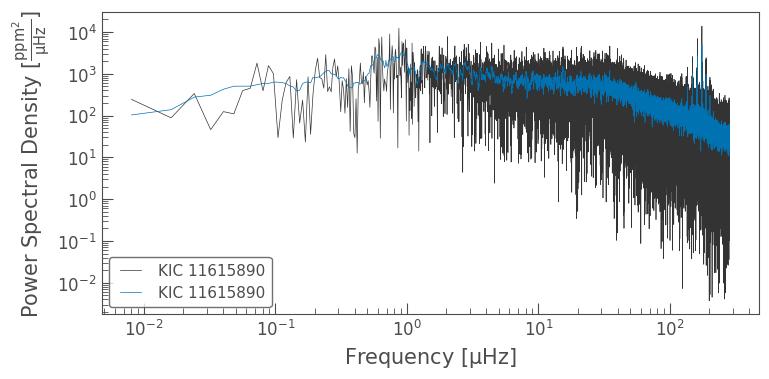

In [15]:
ax = pg.plot(scale='log')
pg.smooth().plot(scale='log', ax=ax)

In [22]:
snr = pg.flatten()

In [23]:
snr.properties()

lightkurve.Periodogram properties:
      Attribute         Description    Units 
---------------------- -------------- -------
              targetid       11615890        
                 label   KIC 11615890        
frequency_at_max_power       175.2029     uHz
             max_power       229.5935        
               nyquist       283.2116     uHz
   period_at_max_power         0.0057 1 / uHz
             frequency array (35172,)     uHz
                period array (35172,) 1 / uHz
                 power array (35172,)        
                  meta <class 'dict'>        


In [24]:
snr.frequency_at_max_power

<Quantity 175.20292727 uHz>

In [26]:
snr.to_table().to_pandas()

,frequency,period,power
0,0.008052,124.193130,1.000000
1,0.016104,62.096565,1.000000
2,0.024156,41.397710,1.000000
3,0.032208,31.048283,1.000000
4,0.040260,24.838626,1.000000
5,0.048312,20.698855,1.000000
6,0.056364,17.741876,1.000000
7,0.064416,15.524141,1.000000
8,0.072468,13.799237,1.000000
9,0.080520,12.419313,1.000000


In [30]:
import numpy as np
time = np.arange(5000)
flux = np.random.randn(len(time))
from lightkurve import LightCurve

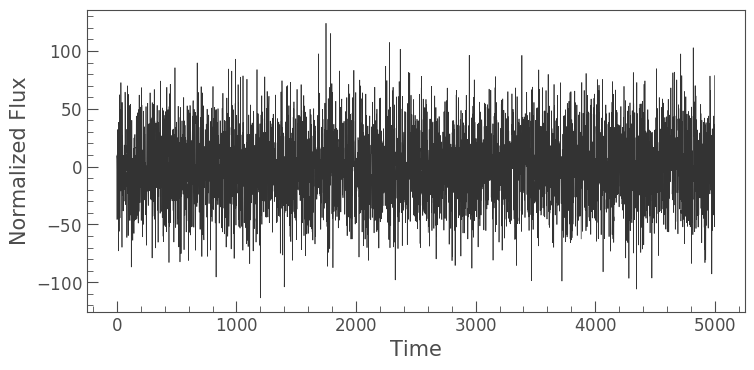

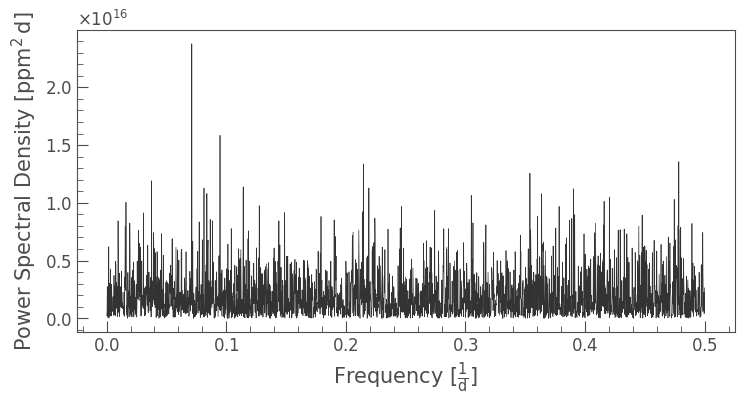

In [32]:
lc = LightCurve(time, flux)
lc.plot()
lc.to_periodogram().plot()